<a href="https://colab.research.google.com/github/helioRocha/programming-4-finance/blob/master/Stock_Price_Prediction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[Computer Science: Stock Price Prediction Using Python & Machine Learning](https://youtu.be/QIUxPv5PJOY)

> **Description**: This program uses an atificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing price of a corporation (AT&T) using the past 60 day stock price.

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


#### Get the stock quote

In [2]:
stock_symbol = 'T'
data_source = 'yahoo'
start = '2011-01-01' 
end = '2021-06-01'


In [3]:
df = web.DataReader(stock_symbol, 
                    data_source, 
                    start, 
                    end)


#### Visualize the closing price history

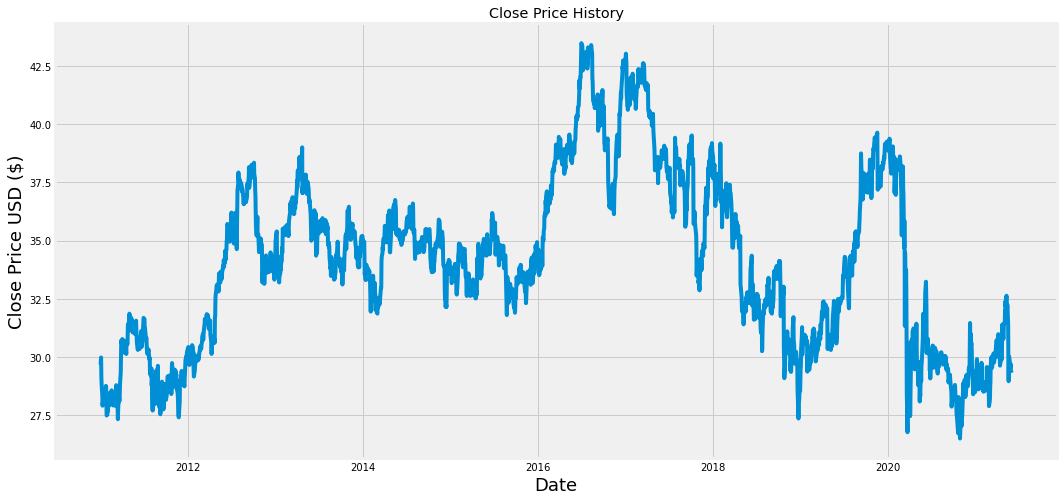

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


#### Create a new dataframe with only the 'Close' column

In [5]:
data = df.filter(['Close'])


#### Convert the dataframe to a numpy array

In [6]:
dataset = data.values


#### Get the number od rows to train the model on

In [7]:
training_data_len = math.ceil(len(dataset) * .8)
training_data_len


2096

#### Scale the data

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.18680023],
       [0.19917495],
       [0.20506772],
       ...,
       [0.18915727],
       [0.17265764],
       [0.16617557]])

#### Create training data ser and the scaled training data set

In [9]:
train_data = scaled_data[0:training_data_len , :]


#### Split the data into x_train and y_train data sets

In [10]:
x_train = [train_data[i-60:i, 0] for i in range(60, len(train_data))]
y_train = [train_data[i, 0] for i in range(60, len(train_data))]


#### Convert the x_train and y_train to numpy arrays

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)


#### Reshape the data

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2036, 60, 1)

#### Build the LSTM model

In [13]:
model = Sequential()

model.add(LSTM(50, 
               return_sequences=True, 
               input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, 
               return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


#### Compile the model

In [14]:
model.compile(optimizer='adam',
              loss='mean_squared_error')


#### Train the model

In [15]:
model.fit(x_train, 
          y_train, 
          batch_size=1, 
          epochs=1)


2036/2036 [==============================] - 71s 26ms/step - loss: 0.0080


#### Create:
- A new array containing scaled values from index 2036
- The testing data sets x_test and y_test


In [16]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = [test_data[i-60:i, 0] for i in range(60, len(test_data))]
y_test = dataset[training_data_len:, :]


#### Convert the data to a numpy array

In [17]:
x_test = np.array(x_test)


#### Reshape the data

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


#### Get the models predicted price values

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


#### Get the root mean squared error (RMSE)

In [20]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


0.22832474089760818

#### Plot the data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


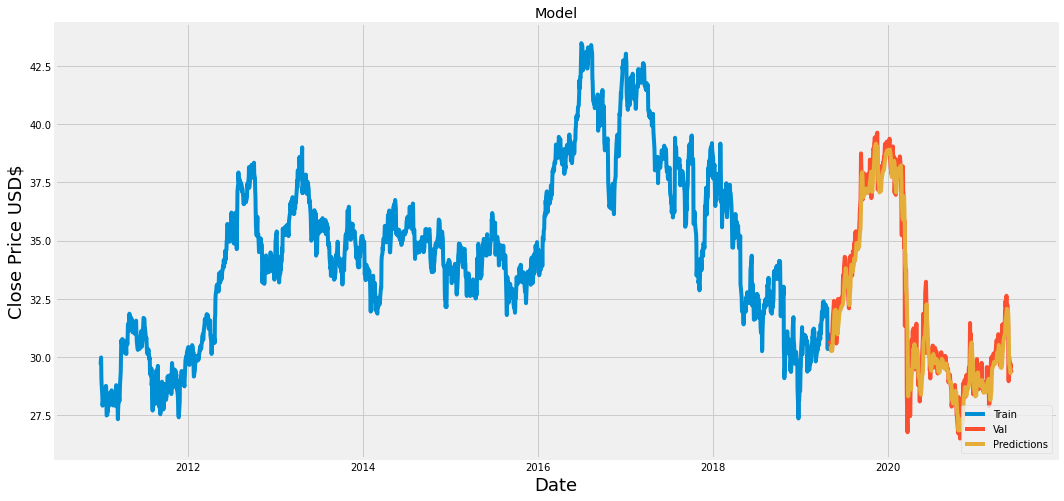

In [21]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


#### Show the valid and predicted prices

In [22]:
valid


,Close,Predictions
Date,,
2019-05-03,30.700001,30.471762
2019-05-06,30.590000,30.458614
2019-05-07,30.530001,30.435081
2019-05-08,30.299999,30.400928
2019-05-09,30.379999,30.320484
...,...,...
2021-05-25,29.520000,29.410156
2021-05-26,29.549999,29.334520
2021-05-27,29.709999,29.304041


#### Get the quote

In [23]:
stock_quote = web.DataReader(stock_symbol,
                             data_source,
                             start,
                             end)


#### Create a new dataframe

In [24]:
new_df = stock_quote.filter(['Close'])


#### Get the last 60 day closing price values and convert the dataframe to an array

In [25]:
last_60_days = new_df[-60:].values


#### Scale the data to be values between 0 and 1

In [26]:
last_60_days_scaled = scaler.transform(last_60_days)


#### Create an empty list and append the past 60 days

In [27]:
X_test = []
X_test.append(last_60_days_scaled)


#### Convert the X_test data set to a numpy array

In [28]:
X_test = np.array(X_test)


#### Reshape the data

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


#### Get the predicted scaled price

In [30]:
pred_price = model.predict(X_test)


#### Undo the scaling

In [31]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[29.303589]]
